In [132]:
cd/Users/yeji-park/Downloads/Time_Series_Analysis_CO2/Datasets

/Users/yeji-park/Downloads/Time_Series_Analysis_CO2/Datasets


In [133]:
# Libraries 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

In [134]:
# Countries not implementing Carbon Tax 

time = 1950 

countries_no_tax = ["United States", "China", "India", "Russia", "Brazil", "Germany", "South Korea", "Canada", "Australia", "Saudi Arabia", "Iran", "Indonesia", "South Africa", "Turkey", "Mexico", "Thailand", "Vietnam", "Malaysia", "Egypt", "United Arab Emirates"]

# Countries without Policy 1 CO2 per Capita
per_capita = pd.read_csv("co-emissions-per-capita.csv")
per_capita.rename(columns = {'Annual CO₂ emissions (per capita)':"CO2_per_capita"}, inplace = True)
per_capita.rename(columns = {'Entity':"Country"}, inplace = True)
per_capita.drop(labels = "Code", axis = 1, inplace = True)

per_capita_filtered_notax = per_capita[per_capita['Country'].isin(countries_no_tax)]
per_capita_filtered_notax = per_capita_filtered_notax[per_capita_filtered_notax['Year'] > time]

# Find the row with the maximum value in 'CO2_per_capita'
max_row = per_capita_filtered_notax.loc[per_capita_filtered_notax['CO2_per_capita'].idxmax()]

print(max_row[['Country', 'CO2_per_capita']])
per_capita_filtered_notax.shape

Country           United Arab Emirates
CO2_per_capita               80.970535
Name: 24774, dtype: object


(1432, 3)

In [135]:
# Simple Exponential Smoothing 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

us = per_capita_filtered_notax[per_capita_filtered_notax["Country"] == 'United States']

us.reset_index(drop=True, inplace=True)

us.index.freq = 'AS'


model = SimpleExpSmoothing(us['CO2_per_capita'])
ses_model = model.fit(smoothing_level=0.3)
us['Forecast'] = ses_model.fittedvalues

# Perform double exponential smoothing
model = sm.tsa.ExponentialSmoothing(us['CO2_per_capita'], trend='add')
des_model = model.fit(smoothing_level=0.3, smoothing_slope=0.2)
us['Forecast'] = des_model.fittedvalues

# Perform triple exponential smoothing
model = sm.tsa.ExponentialSmoothing(us['CO2_per_capita'], trend='add', seasonal='add', seasonal_periods=3)
tes_model = model.fit(smoothing_level=0.3, smoothing_slope=0.2, smoothing_seasonal=0.4)
us['Forecast'] = tes_model.fittedvalues

# Print the DataFrame with the forecasts
print(us)

          Country  Year  CO2_per_capita   Forecast
0   United States  1951       17.388702  16.965225
1   United States  1952       16.680990  17.004744
2   United States  1953       16.808949  17.155663
3   United States  1954       15.735587  17.103813
4   United States  1955       16.932928  16.184607
..            ...   ...             ...        ...
67  United States  2018       16.191355  15.249733
68  United States  2019       15.739861  15.481183
69  United States  2020       14.034053  15.397811
70  United States  2021       14.932488  14.706345
71  United States  2022       14.949616  14.397238

[72 rows x 4 columns]


/Users/yeji-park/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/var/folders/65/q8nnpp8j1slf_vfjb6j_nrkr0000gn/T/ipykernel_60736/2667500297.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us['Forecast'] = ses_model.fittedvalues
/var/folders/65/q8nnpp8j1slf_vfjb6j_nrkr0000gn/T/ipykernel_60736/2667500297.py:17: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  des_model = model.fit(smoothing_level=0.3, smoothing_slope=0.2)
/var/folders/65/q8nnpp8j1slf_vfjb6j_nrkr0000gn/T/ipykernel_60736/2667500297.py:18: SettingWithCopyWarning: 
A value is try

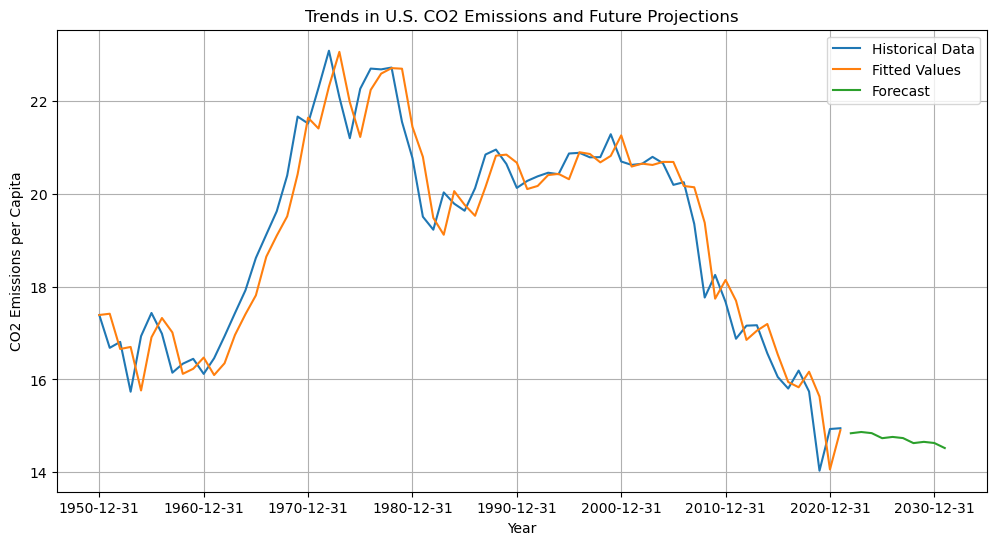

In [136]:
# Resetting index to start from 1950
us.index = pd.date_range(start='1950', periods=len(us), freq='Y')

# Fit the Triple Exponential Smoothing model
model = ExponentialSmoothing(us['CO2_per_capita'], trend='add', seasonal='add', seasonal_periods=3)
fit = model.fit()

forecast = fit.forecast(10)

plt.figure(figsize=(12, 6))
plt.plot(us.index, us['CO2_per_capita'], label='Historical Data')
plt.plot(fit.fittedvalues.index, fit.fittedvalues, label='Fitted Values')
plt.plot(forecast.index, forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita')
plt.title('Trends in U.S. CO2 Emissions and Future Projections')
plt.legend()
plt.grid(True)

# Set x-axis ticks to show every 10 years starting from 1950
plt.xticks(pd.date_range(start='1950', end=us.index[-1] + pd.DateOffset(years=10), freq='10Y'))

plt.show()

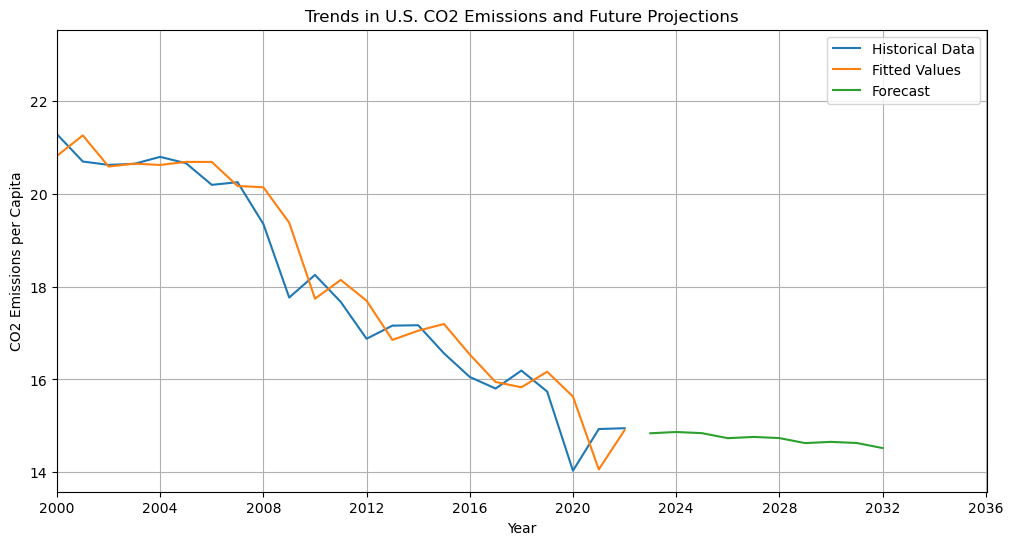

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(us.index, us['CO2_per_capita'], label='Historical Data')
plt.plot(fit.fittedvalues.index, fit.fittedvalues, label='Fitted Values')
plt.plot(forecast.index, forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita')
plt.title('Trends in U.S. CO2 Emissions and Future Projections')
plt.legend()
plt.grid(True)

# Set x-axis limits to start from 2000
plt.xlim(pd.Timestamp('2000-01-01'), None)

plt.show()

In [138]:
forecast

2022-12-31    14.841055
2023-12-31    14.868186
2024-12-31    14.843458
2025-12-31    14.734898
2026-12-31    14.762028
2027-12-31    14.737301
2028-12-31    14.628740
2029-12-31    14.655870
2030-12-31    14.631143
2031-12-31    14.522582
Freq: A-DEC, dtype: float64

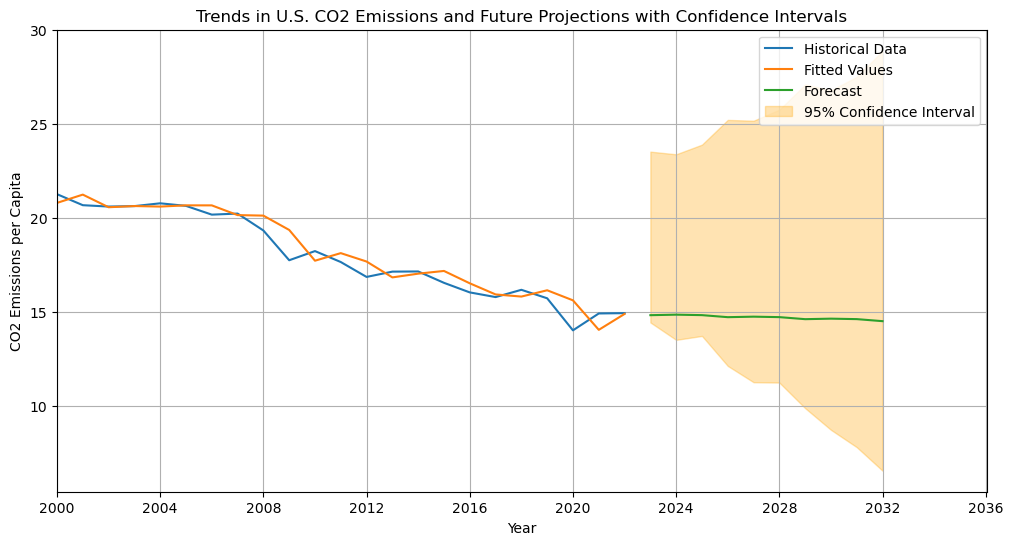

In [139]:
# Number of bootstrap samples
n_bootstrap = 1000

# Initialize array to store forecasts from each bootstrap sample
bootstrap_forecasts = np.zeros((10, n_bootstrap))

# Perform bootstrapping
for i in range(n_bootstrap):
    # Resample with replacement
    resampled_data = np.random.choice(us['CO2_per_capita'], size=len(forecast), replace=True)
    
    # Fit the model on resampled data
    resampled_fit = ExponentialSmoothing(resampled_data, trend='add', seasonal='add', seasonal_periods=3).fit()
    
    # Forecast for the next 10 years
    bootstrap_forecasts[:, i] = resampled_fit.forecast(10)

# Calculate confidence intervals
lower_bound = np.percentile(bootstrap_forecasts, 2.5, axis=1)  # 2.5th percentile
upper_bound = np.percentile(bootstrap_forecasts, 97.5, axis=1)  # 97.5th percentile

# Plot the forecasts with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(us.index, us['CO2_per_capita'], label='Historical Data')
plt.plot(fit.fittedvalues.index, fit.fittedvalues, label='Fitted Values')
plt.plot(fit.forecast(10).index, fit.forecast(10), label='Forecast')
plt.fill_between(fit.forecast(10).index, lower_bound, upper_bound, color='orange', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita')
plt.title('Trends in U.S. CO2 Emissions and Future Projections with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp('2000-01-01'), None)
plt.show()


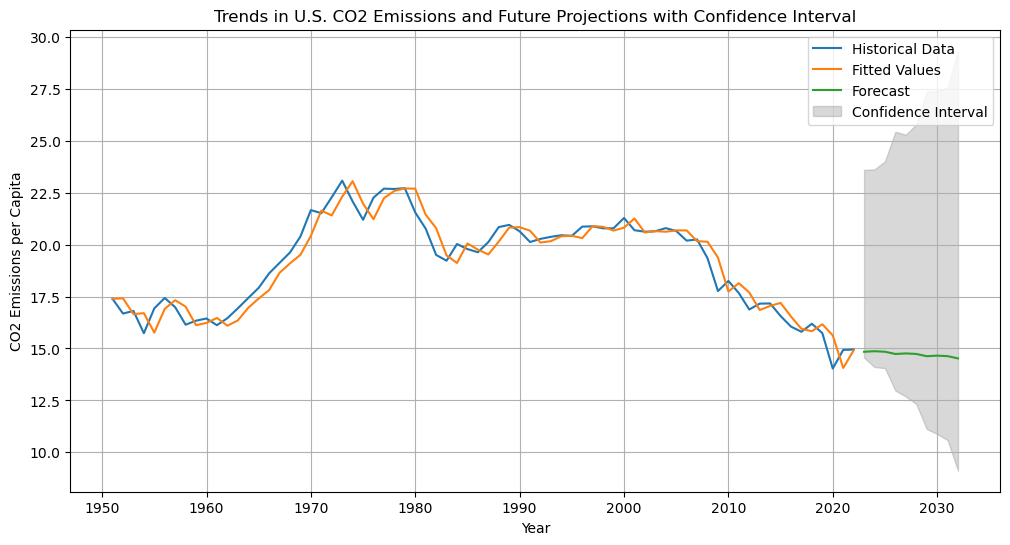

In [142]:
# Number of bootstrap samples
n_bootstrap = 1000

# Initialize array to store forecasts from each bootstrap sample
bootstrap_forecasts = np.zeros((len(forecast), n_bootstrap))

# Perform bootstrapping
for i in range(n_bootstrap):
    # Resample with replacement
    resampled_data = np.random.choice(us['CO2_per_capita'], size=len(forecast), replace=True)
    
    # Fit the model on resampled data
    resampled_fit = ExponentialSmoothing(resampled_data, trend='add', seasonal='add', seasonal_periods=3).fit()
    
    # Forecast for the next 10 years
    bootstrap_forecasts[:, i] = resampled_fit.forecast(10)

# Calculate confidence intervals
lower_bound = np.percentile(bootstrap_forecasts, 2.5, axis=1)  # 2.5th percentile
upper_bound = np.percentile(bootstrap_forecasts, 97.5, axis=1)  # 97.5th percentile

# Plotting with confidence interval around forecast
plt.figure(figsize=(12, 6))
plt.plot(us.index, us['CO2_per_capita'], label='Historical Data')
plt.plot(fit.fittedvalues.index, fit.fittedvalues, label='Fitted Values')
plt.plot(forecast.index, forecast, label='Forecast')

# Plot the confidence interval around the forecast
plt.fill_between(forecast.index, lower_bound, upper_bound, color='gray', alpha=0.3, label='Confidence Interval')

plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita')
plt.title('Trends in U.S. CO2 Emissions and Future Projections with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

In [143]:
upper_bound

array([23.59915104, 23.62305729, 24.01086408, 25.43567543, 25.29203104,
       25.78870718, 27.35852446, 27.40170908, 27.55826998, 29.33664476])

In [144]:
lower_bound

array([14.55659222, 14.10601534, 14.05363427, 12.97136749, 12.68490691,
       12.32774452, 11.1229694 , 10.88249926, 10.58709686,  9.1142654 ])

# Applying the effect of Carbon Tax into Forecast Model

In [145]:
# Given forecast values
forecast_values = np.array([14.841055, 14.868186, 14.843458, 14.734898, 14.762028,
                            14.737301, 14.628740, 14.655870, 14.631143, 14.522582])

# Subtracting 1.57 from each forecast value
adjusted_forecast = forecast_values - 1.57

print(adjusted_forecast)

[13.271055 13.298186 13.273458 13.164898 13.192028 13.167301 13.05874
 13.08587  13.061143 12.952582]


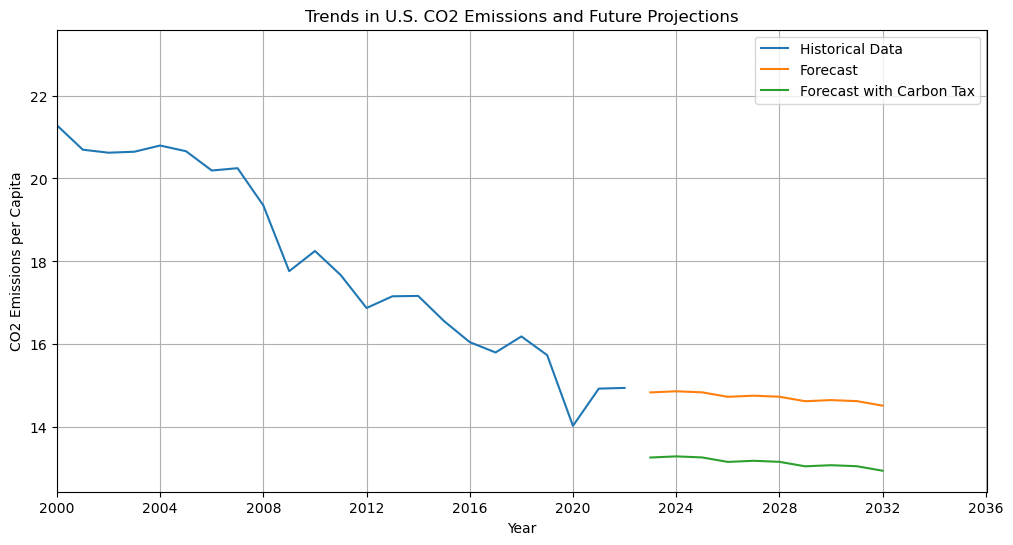

In [146]:
plt.figure(figsize=(12, 6))
plt.plot(us.index, us['CO2_per_capita'], label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast')

# Repeat the last index of fit.fittedvalues.index to match the length of predictions_array
last_index = fit.fittedvalues.index[-1]
extended_index = pd.date_range(start=last_index, periods=len(adjusted_forecast) + 1, freq='Y')
plt.plot(extended_index[1:], adjusted_forecast, label='Forecast with Carbon Tax')

plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita')
plt.title('Trends in U.S. CO2 Emissions and Future Projections')
plt.legend()
plt.grid(True)

# Set x-axis limits to start from 2000
plt.xlim(pd.Timestamp('2000-01-01'), None)

plt.show()


In [147]:
# Calculating Confidence Interval
exponential_upper = np.array([23.70322561, 23.74279626, 24.16573425, 25.48931928, 25.37881459,
       26.00051594, 27.38259631, 27.71542235, 27.77779024, 29.57237817])
exponential_lower = np.array([14.49284232, 14.40762527, 13.98552853, 12.90347056, 12.82713988,
       12.35325642, 10.96125848, 10.70052809, 10.19210136,  9.20113217])

upper_bounds_carbonate = np.array([-1.0926322400000001, -1.0569522900000015, -1.0242794499999996, -0.9898619399999988, -0.9566975199999985, 
                          -0.9223063400000002, -0.8816431200000012, -0.8380156599999997, -0.7944503599999988, -0.7560792399999998])[:10]

lower_bounds_carbonate = np.array([-2.83508578, -2.8430156800000006, -2.85055397, -2.8530120500000002, -2.8533078199999995,
                          -2.8439212000000005, -2.8346633800000003, -2.8253261199999997, -2.819319649999999, -2.8222887300000004])[:10]

# Calculate upper bound of final model
final_model_upper = exponential_upper + lower_bounds_carbonate

# Calculate lower bound of final model
final_model_lower = exponential_lower + upper_bounds_carbonate

# Print upper and lower bounds of final model for each year
for year, upper, lower in zip(range(2024, 2034), final_model_upper, final_model_lower):
    print(f"Year: {year}, Upper Bound: {upper}, Lower Bound: {lower}")


Year: 2024, Upper Bound: 20.86813983, Lower Bound: 13.400210079999999
Year: 2025, Upper Bound: 20.899780579999998, Lower Bound: 13.350672979999999
Year: 2026, Upper Bound: 21.31518028, Lower Bound: 12.96124908
Year: 2027, Upper Bound: 22.63630723, Lower Bound: 11.913608620000002
Year: 2028, Upper Bound: 22.52550677, Lower Bound: 11.870442360000002
Year: 2029, Upper Bound: 23.15659474, Lower Bound: 11.430950079999999
Year: 2030, Upper Bound: 24.54793293, Lower Bound: 10.079615359999998
Year: 2031, Upper Bound: 24.89009623, Lower Bound: 9.86251243
Year: 2032, Upper Bound: 24.958470590000005, Lower Bound: 9.397651000000002
Year: 2033, Upper Bound: 26.75008944, Lower Bound: 8.44505293


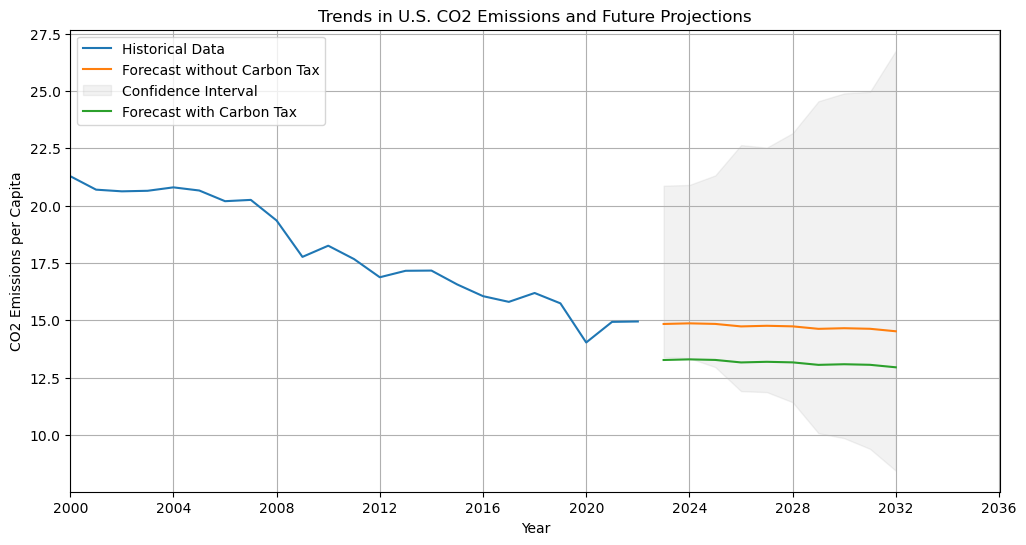

In [148]:
plt.figure(figsize=(12, 6))
plt.plot(us.index, us['CO2_per_capita'], label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast without Carbon Tax')

last_index = fit.fittedvalues.index[-1]
extended_index = pd.date_range(start=last_index, periods=len(forecast) + 1, freq='Y')

plt.fill_between(extended_index[1:], final_model_lower, final_model_upper, color='gray', alpha=0.1, label='Confidence Interval')

plt.plot(extended_index[1:], adjusted_forecast, label='Forecast with Carbon Tax')

plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita')
plt.title('Trends in U.S. CO2 Emissions and Future Projections')
plt.legend(loc='upper left')
plt.grid(True)

plt.xlim(pd.Timestamp('2000-01-01'), None)

plt.show()